Hogg suggests: 

```
How about we start by taking all your models at zero dust, and then again at E(B-V) = 0.05, and plot delta G vs unreddened B-V? Scatter plot. Make sense? That would answer half my questions.
```

The following uses the `fix-extinction` branch of `isochrones`.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from isochrones import get_ichrone
mist = get_ichrone('mist')

In [24]:
N_mass = 100
N_age = 50
N_feh = 10
masses = np.logspace(np.log10(0.2), np.log10(10), N_mass)
ages = np.logspace(np.log10(7), np.log10(9.85), N_age)
fehs = np.linspace(-0.5, 0.2, N_feh)
distances = [100]

N = N_mass*N_age*N_feh

In [25]:
from itertools import product
AV = 0

def calculate_stuff(AV=0):
    G = np.zeros(N)
    BmV = np.zeros(N)
    feh_flat = np.zeros(N)
    for i,(m, a, f, d) in enumerate(product(masses, ages, fehs, distances)):
        G[i] = mist.mag['G'](m, a, f, d, AV)
        B = mist.mag['B'](m, a, f, d, AV)
        V = mist.mag['V'](m, a, f, d, AV)
        BmV[i] = B-V
        feh_flat[i] = f

    return G, BmV, feh_flat
        
G, BmV, feh_flat = calculate_stuff()

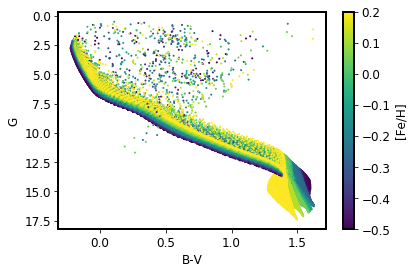

In [26]:
fig, ax = plt.subplots(1,1)
cax = ax.scatter(BmV, G, c=feh_flat, cmap='viridis', s=1)
ax.invert_yaxis()
ax.set_xlabel('B-V')
ax.set_ylabel('G')
fig.colorbar(cax, label='[Fe/H]');

In [27]:
G2, BmV2, feh_flat2 = calculate_stuff(AV=0.15)

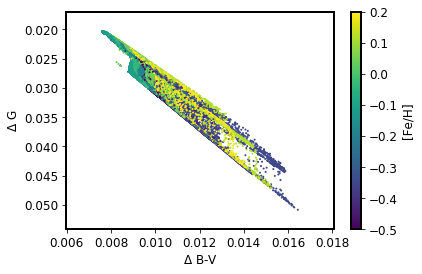

In [28]:
fig, ax = plt.subplots(1,1)
cax = ax.scatter(BmV2 - BmV, G2 - G, c=feh_flat2, cmap='viridis', s=1)
ax.invert_yaxis()
ax.set_xlabel('$\Delta$ B-V')
ax.set_ylabel('$\Delta$ G')
fig.colorbar(cax, label='[Fe/H]');